In [1]:
#importing libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the data
d=pd.read_csv('D:/analytics/project/Train_data.csv')

In [3]:
d.shape

(3333, 21)

In [4]:
#Structure of data
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [5]:
d.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [4]:
#Converting variables from string type to numerical data type
d['international plan'].unique()
d['international plan']=d['international plan'].replace(' no',0)
d['international plan']=d['international plan'].replace(' yes',1)

In [5]:
d['voice mail plan'].unique()
d['voice mail plan']=d['voice mail plan'].replace(' yes',1)
d['voice mail plan']=d['voice mail plan'].replace(' no',0)

In [6]:
d['Churn'].unique()
d['Churn']=d['Churn'].replace(' False.',0)
d['Churn']=d['Churn'].replace(' True.',1)

In [7]:
d['state'].unique()
d['state']=pd.Categorical(d['state'])
d['state']=d['state'].cat.codes

In [8]:
#verifying the data
d.dtypes

state                               int8
account length                     int64
area code                          int64
phone number                      object
international plan                 int64
voice mail plan                    int64
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                              int64
dtype: object

# Missing value analysis

In [104]:
mv=pd.DataFrame(d.isnull().sum()).reset_index()
mv=mv.rename(columns={'index':'Columns',0:'count'})
mv

,Columns,count
0,state,0
1,account length,0
2,area code,0
3,phone number,0
4,international plan,0
5,voice mail plan,0
6,number vmail messages,0
7,total day minutes,0
8,total day calls,0
9,total day charge,0


# Exploratory data analysis

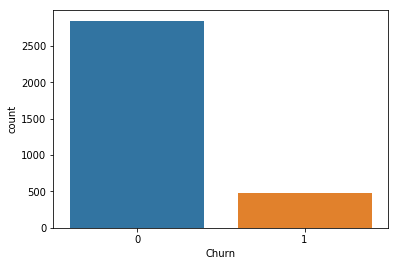

In [105]:
#Number of churns
sns.countplot(d['Churn'])

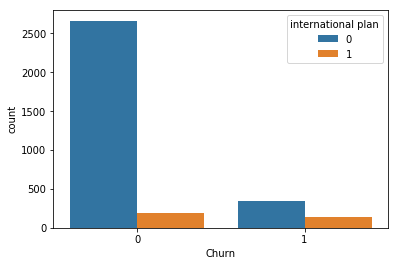

In [11]:
#Behaviour of customers having international plan
sns.countplot(d['Churn'],hue=d['international plan'])

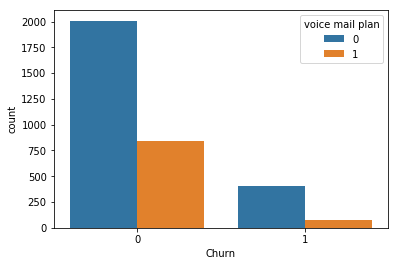

In [12]:
#Behaviour of customers having voice mail plan
sns.countplot(d['Churn'],hue=d['voice mail plan'])

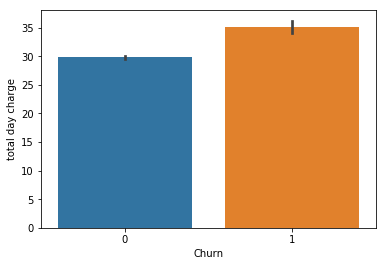

In [13]:
#Graph of 'total day charge' vs 'churn'
sns.barplot(x=d['Churn'],y=d['total day charge'])

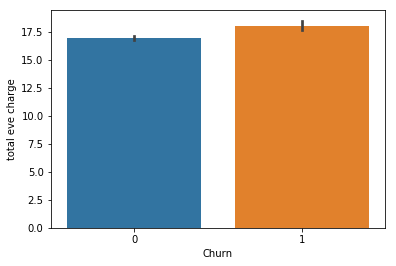

In [14]:
#Graph of 'total eve charge' vs 'churn'
sns.barplot(x=d['Churn'],y=d['total eve charge'])

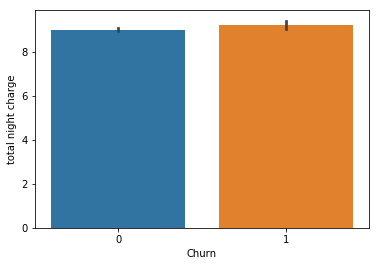

In [15]:
#Graph of 'total night charge' vs 'churn'
sns.barplot(x=d['Churn'],y=d['total night charge'])

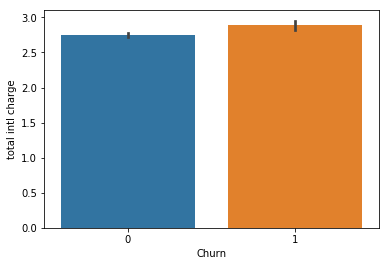

In [18]:
#Graph of 'total intl charge' vs 'churn'
sns.barplot(x=d['Churn'],y=d['total intl charge'])

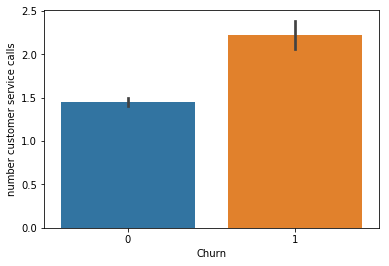

In [19]:
#Graph of 'number customer service calls' vs 'churn'
sns.barplot(x=d['Churn'],y=d['number customer service calls'])

# Outlier analysis

In [72]:
#continuous variables
cont=['account length', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls']

#categorical variables
categ=['state','area code','international plan', 'voice mail plan']

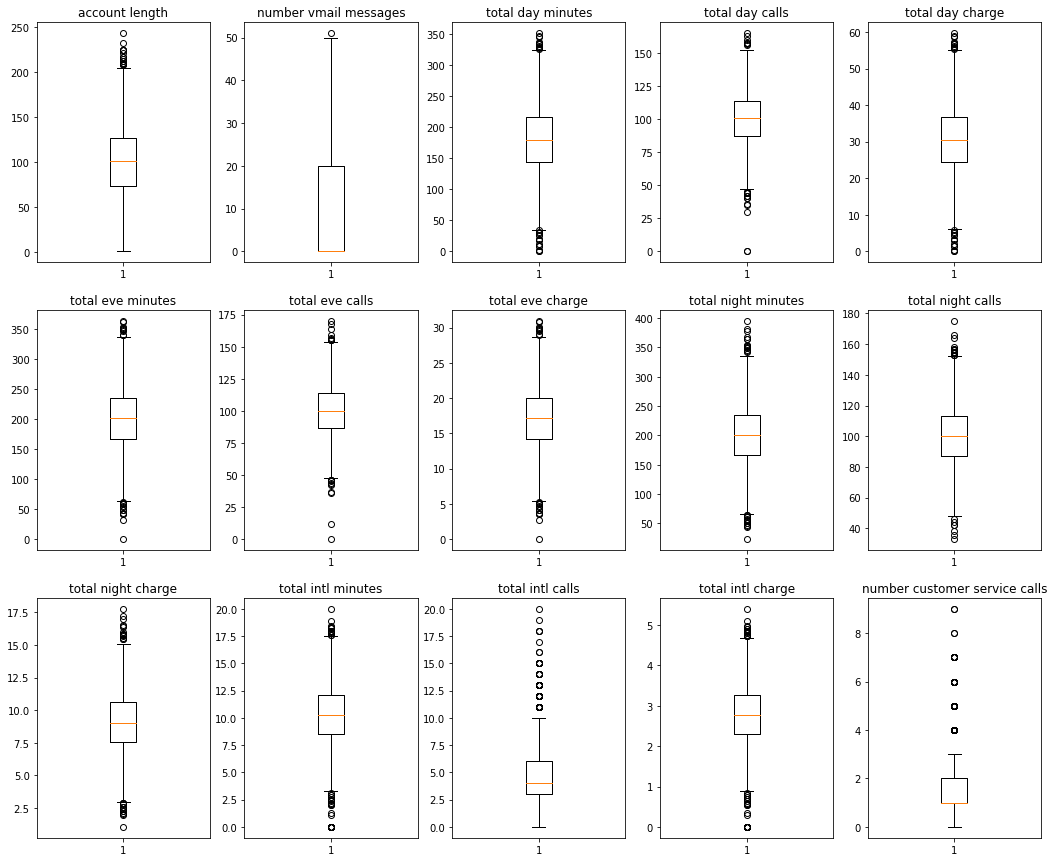

In [57]:
#boxplots to find outliers
plt.figure(figsize=(18,15))
for i in range(len(cont)):
    plt.subplot(3,5,i+1)
    plt.boxplot(d[cont[i]])
    plt.title(cont[i])
plt.show()


In [61]:
#Since all the values are in the range, lets keep the variables as is.

# Feature selection

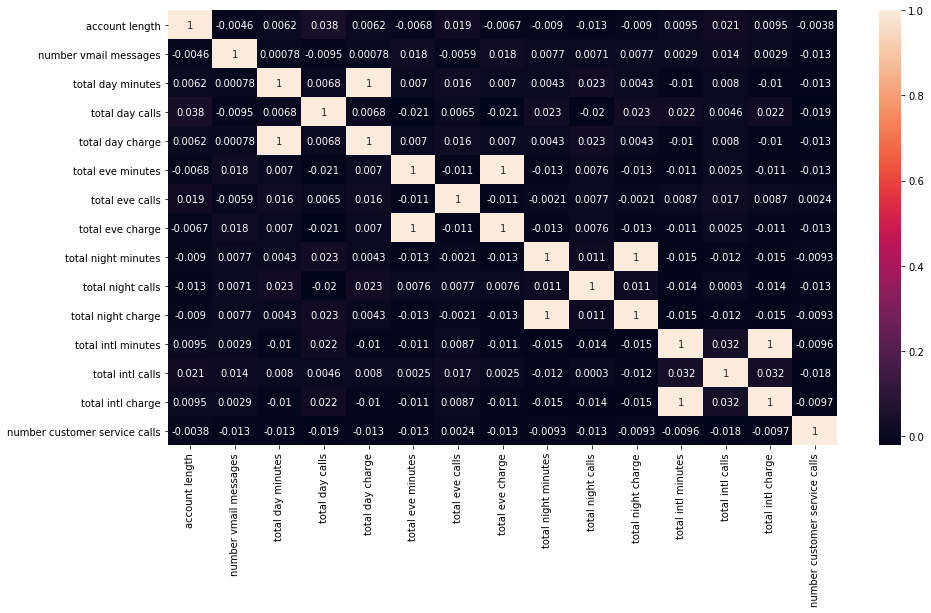

In [68]:
#correlation analysis
plt.figure(figsize=(15,8))
sns.heatmap(d.loc[:,cont].corr(),annot=True)

#From corrplot it is found that multi collinearity exists between some continuous variables.

In [76]:
#chi square test to check the relationship between categorical variables
from scipy.stats import chi2_contingency
for i in categ:
    chi,p,dof,ex=chi2_contingency(pd.crosstab(d['Churn'],d[i]))
    print(i)
    print(p)

state
0.002296221552011188
area code
0.9150556960243712
international plan
2.4931077033159556e-50
voice mail plan
5.15063965903898e-09


In [9]:
#Since p value of variable 'area code'>0.05, Null hypothesis is true. That means area code is independent of target variable.
d=d.drop(['area code','total day minutes','total eve minutes','total night minutes','total intl minutes','phone number'],axis=1)

In [10]:
#Verifying data after removing variables
d.shape

(3333, 15)

In [11]:
d.dtypes

state                               int8
account length                     int64
international plan                 int64
voice mail plan                    int64
number vmail messages              int64
total day calls                    int64
total day charge                 float64
total eve calls                    int64
total eve charge                 float64
total night calls                  int64
total night charge               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                              int64
dtype: object

# Feature scaling

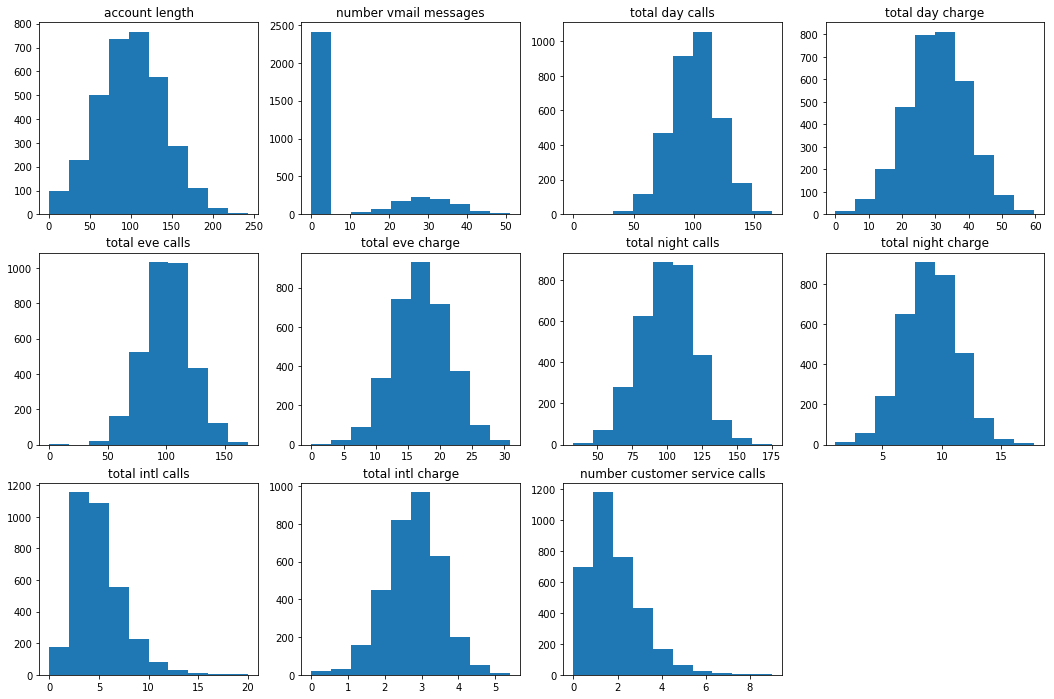

In [147]:
#normality check for continuous variables
cont=['account length', 'number vmail messages','total day calls', 'total day charge','total eve calls', 'total eve charge',
        'total night calls', 'total night charge','total intl calls', 'total intl charge','number customer service calls']

categ=['state','international plan', 'voice mail plan']

plt.figure(figsize=(18,12))
for i in range(len(cont)):
    plt.subplot(3,4,i+1)
    plt.hist(d[cont[i]])
    plt.title(cont[i])
plt.show()

In [15]:
#preparing train and test data
train=d.copy()

In [12]:
test=pd.read_csv('D:/analytics/project/Test_data.csv')
test['international plan']=test['international plan'].replace(' no',0)
test['international plan']=test['international plan'].replace(' yes',1)
test['voice mail plan']=test['voice mail plan'].replace(' yes',1)
test['voice mail plan']=test['voice mail plan'].replace(' no',0)
test['Churn']=test['Churn'].replace(' False.',0)
test['Churn']=test['Churn'].replace(' True.',1)
test['state']=pd.Categorical(test['state'])
test['state']=test['state'].cat.codes
test=test.drop(['area code','total day minutes','total eve minutes','total night minutes','total intl minutes','phone number'],axis=1)

In [13]:
#verifying test data
test.shape

(1667, 15)

# Model development

# Decision tree

In [27]:
#importing library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#applying decision tree model on train data
dtree=DecisionTreeClassifier(criterion='entropy').fit(train.iloc[:,:14],train.iloc[:,14])

#predicting values
p=dtree.predict(test.iloc[:,:14])

#confusion matrix
cm=pd.crosstab(test['Churn'],p)

tn=cm[0][0]
fp=cm[1][0]
fn=cm[0][1]
tp=cm[1][1]

cm

col_0,0,1
Churn,,
0,1386,57
1,68,156


In [28]:
#calculating error metrics
accuracy=accuracy_score(test['Churn'],p)
fnr=fn/(fn+tp)
tpr=tp/(tp+fn)

print('Accuracy: ',accuracy*100)
print('False negative rate: ',fnr*100)
print('Sensitivity: ',tpr*100)

Accuracy:  92.50149970005998
False negative rate:  30.357142857142854
Sensitivity:  69.64285714285714


# Random forest

In [34]:
#importing library
from sklearn.ensemble import RandomForestClassifier

#applying random forest model on train data
rf=RandomForestClassifier(n_estimators=500).fit(train.iloc[:,:14],train.iloc[:,14])

#predicting values
p=rf.predict(test.iloc[:,:14])

#confusion matrix
cm=pd.crosstab(test['Churn'],p)

tn=cm[0][0]
fp=cm[1][0]
fn=cm[0][1]
tp=cm[1][1]

cm

col_0,0,1
Churn,,
0,1439,4
1,67,157


In [35]:
#calculating error metrics
accuracy=accuracy_score(test['Churn'],p)
fnr=fn/(fn+tp)
tpr=tp/(tp+fn)

print('Accuracy: ',accuracy*100)
print('False negative rate: ',fnr*100)
print('Sensitivity: ',tpr*100)

Accuracy:  95.74085182963408
False negative rate:  29.910714285714285
Sensitivity:  70.08928571428571


# Logistic regression

In [154]:
#preparing data for logistic regression
dtrain=d.loc[:,cont]
for i in categ:
    temp=pd.get_dummies(d[i],prefix=i)
    dtrain=dtrain.join(temp)
dtrain=dtrain.join(d['Churn'])

In [156]:
#verifying train data for logistic regression
dtrain.columns
dtrain.shape

(3333, 67)

In [157]:
#preparing test data for logistic regression
dtest=test.loc[:,cont]
for i in categ:
    temp=pd.get_dummies(test[i],prefix=i)
    dtest=dtest.join(temp)
dtest=dtest.join(test['Churn'])

#verifying test data for logistic regression
dtest.columns
dtest.shape

(1667, 67)

In [186]:
#importing library
from sklearn.linear_model import LogisticRegression

#applying linear regression on train data
lr=LogisticRegression().fit(dtrain.iloc[:,:66],dtrain.iloc[:,66])

#predicting values
p=lr.predict(dtest.iloc[:,:66])

#confusion matrix
cm=pd.crosstab(dtest['Churn'],p)

tn=cm[0][0]
fp=cm[1][0]
fn=cm[0][1]
tp=cm[1][1]

cm

col_0,0,1
Churn,,
0,1404,39
1,174,50


In [187]:
#calculating error metrics
accuracy=accuracy_score(dtest['Churn'],p)
fnr=fn/(fn+tp)
tpr=tp/(tp+fn)

print('Accuracy: ',accuracy*100)
print('False negative rate: ',fnr*100)
print('Sensitivity: ',tpr*100)

Accuracy:  87.22255548890222
False negative rate:  77.67857142857143
Sensitivity:  22.321428571428573


# KNN

In [188]:
#importing library
from sklearn.neighbors import KNeighborsClassifier

#applying KNN model on train data
km=KNeighborsClassifier(n_neighbors=3).fit(train.iloc[:,:14],train.iloc[:,14])

#predicting values
p=km.predict(test.iloc[:,:14])

#confusion matrix
cm=pd.crosstab(test['Churn'],p)

tn=cm[0][0]
fp=cm[1][0]
fn=cm[0][1]
tp=cm[1][1]

cm

col_0,0,1
Churn,,
0,1401,42
1,194,30


In [189]:
#calculating error metrics
accuracy=accuracy_score(test['Churn'],p)
fnr=fn/(fn+tp)
tpr=tp/(tp+fn)

print('Accuracy: ',accuracy*100)
print('False negative rate: ',fnr*100)
print('Sensitivity: ',tpr*100)

Accuracy:  85.84283143371326
False negative rate:  86.60714285714286
Sensitivity:  13.392857142857142


# Naive Bayes

In [19]:
#importing library
from sklearn.naive_bayes import GaussianNB

#applying naive bayes model on train data
nb=GaussianNB().fit(train.iloc[:,:14],train.iloc[:,14])

#predicting values
p=nb.predict(test.iloc[:,:14])

#confusion matrix
cm=pd.crosstab(test['Churn'],p)

tn=cm[0][0]
fp=cm[1][0]
fn=cm[0][1]
tp=cm[1][1]

cm

col_0,0,1
Churn,,
0,1342,101
1,135,89


In [21]:
#calculating error metrics
accuracy=accuracy_score(test['Churn'],p)
fnr=fn/(fn+tp)
tpr=tp/(tp+fn)

print('Accuracy: ',accuracy*100)
print('False negative rate: ',fnr*100)
print('Sensitivity: ',tpr*100)

Accuracy:  85.84283143371326
False negative rate:  60.26785714285714
Sensitivity:  39.732142857142854


In [24]:
#Out of all the models, Random forest has the highest accuracy and lowest False negative rate.
#Hence will freeze Random forest model for this data set.